<h1 align="center" style="color:#ff9800; font-family:Georgia, serif;">
  🏏 IPL Performance Analysis
</h1>

<h3 align="center">
  <span style="color:white; background-color:#1e88e5; padding:4px 10px; border-radius:5px;">EDA</span>
  <span style="color:white; background-color:#43a047; padding:4px 10px; border-radius:5px;">Performance Scoring</span>
  <span style="color:white; background-color:#fb8c00; padding:4px 10px; border-radius:5px;">Batting & Bowling Insights</span>
</h3>

---

### 📌 Introduction

This notebook presents a comprehensive **Exploratory Data Analysis (EDA)** of the **Indian Premier League (IPL 2008 - 2024)** using ball-by-ball match data.

It focuses on analyzing player performance with metrics such as:

- 🎯 **Batting**: Strike rate, boundary rate, runs, dismissals
- 🎯 **Bowling**: Wickets, economy rate, extras, overs bowled
- 🧠 **Custom Scoring**: Unbiased, normalized scores to rank top batters and bowlers
- 📊 **Visualizations**: Bar charts and metric-based rankings for top performers

The goal is to derive **actionable insights** about individual player effectiveness, consistency, and impact — using **data-driven methods** that fairly balance different performance dimensions.

---

### 📂 What’s Covered

- ✅ Ball-by-ball data preprocessing
- ✅ Calculation of legal deliveries, valid dismissals
- ✅ Custom **batting & bowling performance scores**
- ✅ Ranking of **top performers** based on normalized metrics
- ✅ Interactive **visual analysis** using Plotly

---

### 📈 Data Source

Ball-by-ball IPL match data including runs, extras, wickets, player details, dismissal types, and innings context.

---https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020?select=deliveries.csv

> 📊 Whether you're analyzing top strike bowlers or the most consistent batters, this notebook provides a complete analytical framework for **IPL performance evaluation**.


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="text-align: left; background-color:#73a5c7; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">Content</div>


* &nbsp; **[Data visualization](#DATA-VISUALIZATION)**

* &nbsp; **[Performance Analysis](#PERFORMANCE-ANALYSIS)**

* &nbsp; **[Final Report](#FINAL-REPORT)**


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">LOAD LIBRARY & DATASET</div>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde
from plotly.subplots import make_subplots
import pprint

In [2]:
data = pd.read_csv("../datasets/deliveries.csv")

In [3]:
data.shape

(260920, 17)

In [4]:
#### to dispaly all feature without wrap in data.head()
pd.set_option('display.max_columns', None)

In [5]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">DATA OVERVIEW</div>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [7]:
data.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [8]:
def Columns_Info(data):
    """
    Display a table showing the number of unique values for each column in the DataFrame.
    """
    unique_counts = {
        "Column": data.columns,
        "Unique Values": [data[col].nunique() for col in data.columns],
        'null values': [data[col].isna().sum() for col in data.columns]
    }
    
    result_df = pd.DataFrame(unique_counts)
    display(result_df)
Columns_Info(data)

,Column,Unique Values,null values
0,match_id,1095,0
1,inning,6,0
2,batting_team,19,0
3,bowling_team,19,0
4,over,20,0
5,ball,11,0
6,batter,673,0
7,bowler,530,0
8,non_striker,663,0
9,batsman_runs,7,0


## All Unique Values

In [9]:
data['inning'].value_counts()

inning
1    135018
2    125741
3        77
4        72
5         8
6         4
Name: count, dtype: int64

In [10]:
data['batting_team'].value_counts()  ## bowling team is same as bating team

batting_team
Mumbai Indians                 31437
Kolkata Knight Riders          29514
Chennai Super Kings            28651
Royal Challengers Bangalore    28205
Rajasthan Royals               26242
Kings XI Punjab                22646
Sunrisers Hyderabad            21843
Delhi Daredevils               18786
Delhi Capitals                 10946
Deccan Chargers                 9034
Punjab Kings                    6833
Gujarat Titans                  5494
Pune Warriors                   5443
Lucknow Super Giants            5400
Gujarat Lions                   3566
Rising Pune Supergiant          1900
Royal Challengers Bengaluru     1818
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64

In [11]:
data['batsman_runs'].value_counts()

batsman_runs
0    103940
1     96778
4     29850
2     16453
6     13051
3       783
5        65
Name: count, dtype: int64

In [12]:
data['extra_runs'].value_counts()

extra_runs
0    246795
1     12628
2       585
4       504
5       325
3        82
7         1
Name: count, dtype: int64

In [13]:
data['total_runs'].value_counts()

total_runs
1    108440
0     90438
4     30221
2     17323
6     12964
3       922
5       524
7        88
Name: count, dtype: int64

In [14]:
data['extras_type'].value_counts()

extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
penalty       2
Name: count, dtype: int64

In [15]:
data['dismissal_kind'].value_counts()

dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

In [16]:

data['fielder'].value_counts().head(30)

fielder
MS Dhoni          220
KD Karthik        199
AB de Villiers    141
RV Uthappa        133
V Kohli           131
WP Saha           131
SK Raina          119
RA Jadeja         116
SV Samson         115
RG Sharma         111
KA Pollard        106
S Dhawan          102
RR Pant           100
MK Pandey          98
DA Warner          97
PA Patel           95
Q de Kock          90
KL Rahul           89
F du Plessis       87
DA Miller          86
NV Ojha            82
DJ Bravo           81
AM Rahane          81
AC Gilchrist       75
AT Rayudu          75
AR Patel           72
SA Yadav           70
HH Pandya          67
Ishan Kishan       66
SPD Smith          64
Name: count, dtype: int64

In [17]:
Columns_Info(data)

,Column,Unique Values,null values
0,match_id,1095,0
1,inning,6,0
2,batting_team,19,0
3,bowling_team,19,0
4,over,20,0
5,ball,11,0
6,batter,673,0
7,bowler,530,0
8,non_striker,663,0
9,batsman_runs,7,0


In [18]:
data['batting_team'].value_counts().head()

batting_team
Mumbai Indians                 31437
Kolkata Knight Riders          29514
Chennai Super Kings            28651
Royal Challengers Bangalore    28205
Rajasthan Royals               26242
Name: count, dtype: int64

In [19]:
data['bowling_team'].value_counts().head()

bowling_team
Mumbai Indians                 31505
Kolkata Knight Riders          29663
Chennai Super Kings            28576
Royal Challengers Bangalore    28358
Rajasthan Royals               26432
Name: count, dtype: int64

### Let's Rename Royal challengers Bangalore to Bengaluru

In [20]:
data[data['batting_team']== 'Royal Challengers Bangalore']

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242749,1359544,1,Royal Challengers Bangalore,Gujarat Titans,19,2,Anuj Rawat,MM Sharma,V Kohli,1,0,1,NaN,0,NaN,NaN,NaN
242750,1359544,1,Royal Challengers Bangalore,Gujarat Titans,19,3,V Kohli,MM Sharma,Anuj Rawat,1,0,1,NaN,0,NaN,NaN,NaN
242751,1359544,1,Royal Challengers Bangalore,Gujarat Titans,19,4,Anuj Rawat,MM Sharma,V Kohli,6,0,6,NaN,0,NaN,NaN,NaN
242752,1359544,1,Royal Challengers Bangalore,Gujarat Titans,19,5,Anuj Rawat,MM Sharma,V Kohli,4,0,4,NaN,0,NaN,NaN,NaN


In [21]:
data['batting_team'] = data['batting_team'].replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
### rename because the franchise officially changed its name from Royal Challengers Bangalore to Royal Challengers Bengaluru, likely to reflect the updated city name or for consistency.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">DATA VISUALIZATION</div>

In [22]:
data[data['batting_team']== 'Royal Challengers Bengaluru']

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260361,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,19,2,KV Sharma,Sandeep Sharma,Swapnil Singh,4,0,4,NaN,0,NaN,NaN,NaN
260362,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,19,3,KV Sharma,Sandeep Sharma,Swapnil Singh,1,0,1,NaN,0,NaN,NaN,NaN
260363,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,19,4,Swapnil Singh,Sandeep Sharma,KV Sharma,6,0,6,NaN,0,NaN,NaN,NaN
260364,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,19,5,Swapnil Singh,Sandeep Sharma,KV Sharma,1,0,1,NaN,0,NaN,NaN,NaN


In [23]:
team_matches = data[['match_id', 'batting_team']].drop_duplicates()


match_counts = team_matches['batting_team'].value_counts().reset_index()
match_counts.columns = ['Team', 'Matches_Played']

fig = px.bar(
    match_counts.sort_values('Matches_Played', ascending=False),
    x='Team',
    y='Matches_Played',
    title='🏏 Number of Matches Played by Each Team',
    text='Matches_Played',
    color='Team',
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Number of Matches',
    xaxis={'categoryorder': 'total descending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height = 600,
    showlegend = False
)

fig.show()

MUMBAI INDIAN IS HIGHWES PLAYING MATCH TEAM AND FOLLOWED BY RCB AND KKR FROM 2008 TP 2024

In [24]:
batter_matches = data[['match_id', 'batter']].drop_duplicates()


match_counts = batter_matches['batter'].value_counts().reset_index().head(20)
match_counts.columns = ['batter', 'Matches_Played']

fig = px.bar(
    match_counts.sort_values('Matches_Played', ascending=False),
    x='batter',
    y='Matches_Played',
    title='🏏 Number of Matches Played by Each batter',
    text='Matches_Played',
    color='batter',
    color_discrete_sequence=px.colors.qualitative.Antique
)
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='batter',
    yaxis_title='Number of Matches',
    xaxis={'categoryorder': 'total descending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height = 600,
    showlegend = False
)

fig.show()

In [25]:
bowler_matches = data[['match_id', 'bowler']].drop_duplicates()


match_counts = bowler_matches['bowler'].value_counts().reset_index().head(20)
match_counts.columns = ['bowler', 'Matches_Played']

fig = px.bar(
    match_counts.sort_values('Matches_Played', ascending=False),
    x='bowler',
    y='Matches_Played',
    title='🔴 Number of Matches Played by Each Bowler',

    text='Matches_Played',
    color='bowler',
    color_discrete_sequence=px.colors.qualitative.Set2_r
)
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='bowler',
    yaxis_title='Number of Matches',
    xaxis={'categoryorder': 'total descending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height = 600,
    showlegend = False
)

fig.show()

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">PERFORMANCE ANALYSIS</div>

In [26]:
batter_runs = data.groupby('batter')['batsman_runs'].sum().reset_index()

batter_runs = batter_runs.sort_values(by='batsman_runs', ascending=False)
top_batters = batter_runs.head(10)

fig = px.bar(
    top_batters,
    x='batter',
    y='batsman_runs',
    title='🏏 Top 10 Highest Run Scorers',
    text='batsman_runs',
    color='batter',
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Batter',
    yaxis_title='Total Runs Scored',
    xaxis={'categoryorder': 'total descending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height = 550,
    showlegend = False
)

fig.show()

In [27]:
bowler_wicket = data.groupby('bowler')['is_wicket'].sum().reset_index()

bowler_wicket = bowler_wicket.sort_values(by='is_wicket', ascending=False)
top_bowlers = bowler_wicket.head(10)

fig = px.bar(
    top_bowlers,
    x='bowler',
    y='is_wicket',
    title='🏏🔴 Top 10 Highest Wicket Taker',
    text='is_wicket',
    color='bowler',
    color_discrete_sequence=px.colors.qualitative.Prism_r
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='bowler',
    yaxis_title='Total Wicket Taken',
    xaxis={'categoryorder': 'total descending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height = 550,
    showlegend = False
)

fig.show()

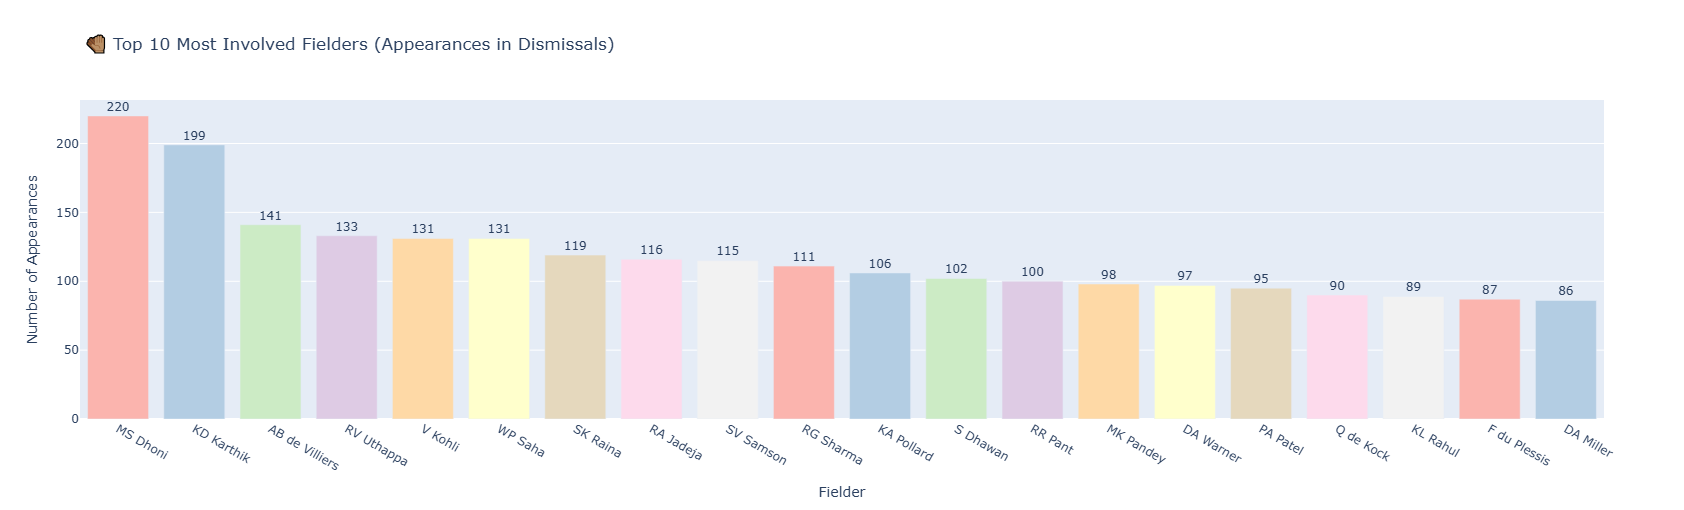

In [28]:
fielder_counts = data['fielder'].value_counts().reset_index()
fielder_counts.columns = ['fielder', 'appearance_count']

top_fielders = fielder_counts.head(20)

fig = px.bar(
    top_fielders,
    x='fielder',
    y='appearance_count',
    title='🧤 Top 10 Most Involved Fielders (Appearances in Dismissals)',
    text='appearance_count',
    color='fielder',
    color_discrete_sequence=px.colors.qualitative.Pastel1
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Fielder',
    yaxis_title='Number of Appearances',
    xaxis={'categoryorder': 'total descending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height=510,
    showlegend = False
)

fig.show()

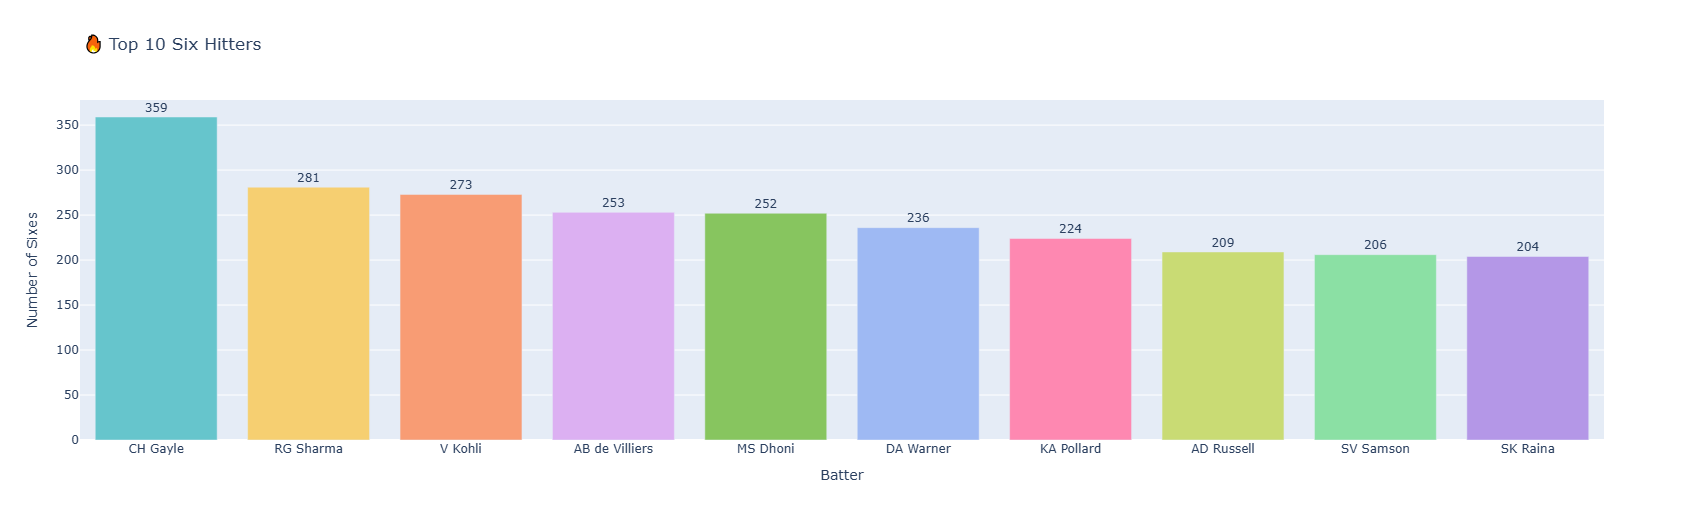

In [29]:
sixes = data[data['batsman_runs'] == 6]

sixes_count = sixes['batter'].value_counts().reset_index()
sixes_count.columns = ['batter', 'sixes']

top_sixers = sixes_count.head(10)

fig = px.bar(
    top_sixers,
    x='batter',
    y='sixes',
    title='🔥 Top 10 Six Hitters',
    text='sixes',
    color='batter',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Batter',
    yaxis_title='Number of Sixes',
    xaxis={'categoryorder': 'total descending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height = 520,
    showlegend = False
)
fig.show()

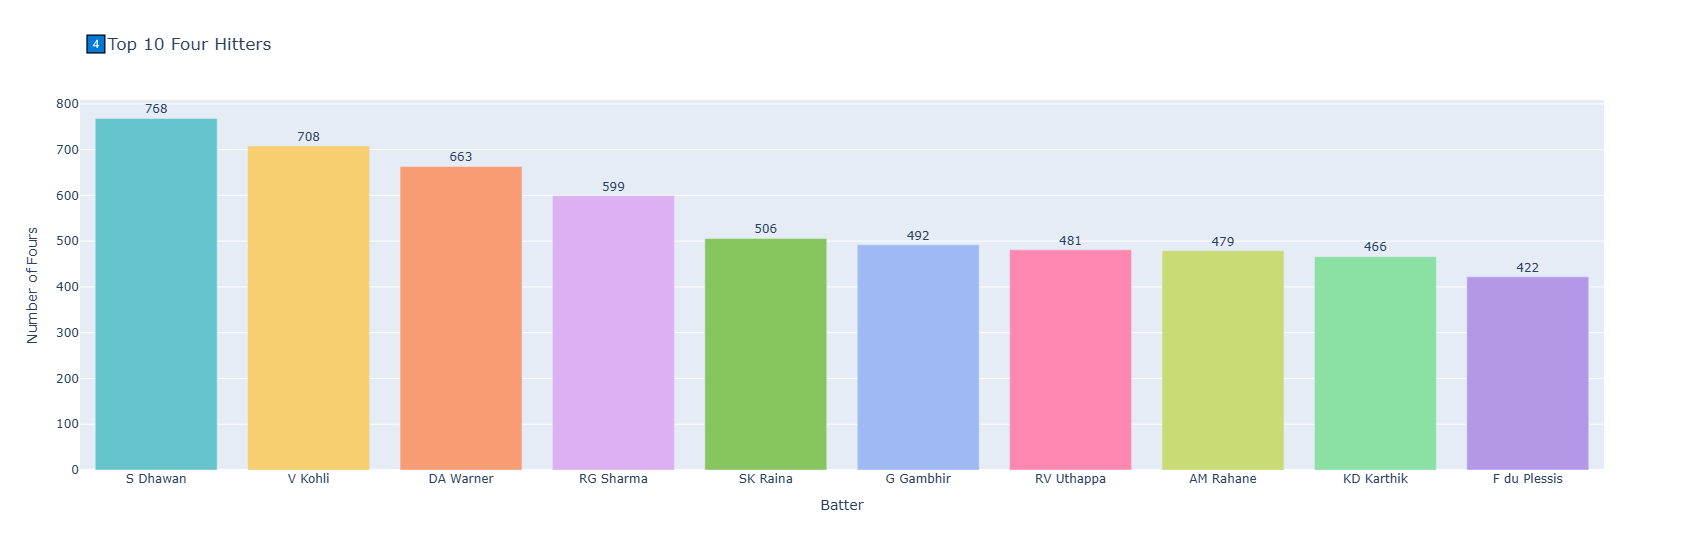

In [30]:
fours = data[data['batsman_runs'] == 4]

fours_count = fours['batter'].value_counts().reset_index()
fours_count.columns = ['batter', 'fours']

top_four_hitters = fours_count.head(10)

fig = px.bar(
    top_four_hitters,
    x='batter',
    y='fours',
    title= '4️⃣Top 10 Four Hitters',
    text='fours',
    color='batter',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Batter',
    yaxis_title='Number of Fours',
    xaxis={'categoryorder': 'total descending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height = 550,
    showlegend = False
)

fig.show()

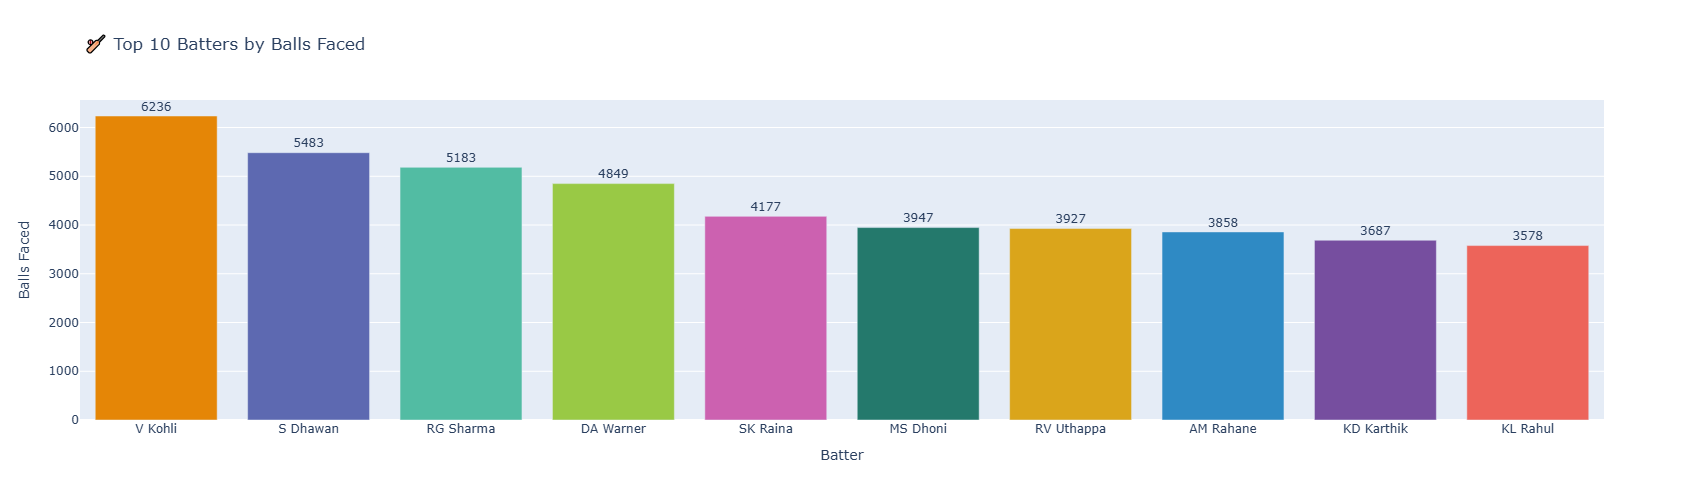

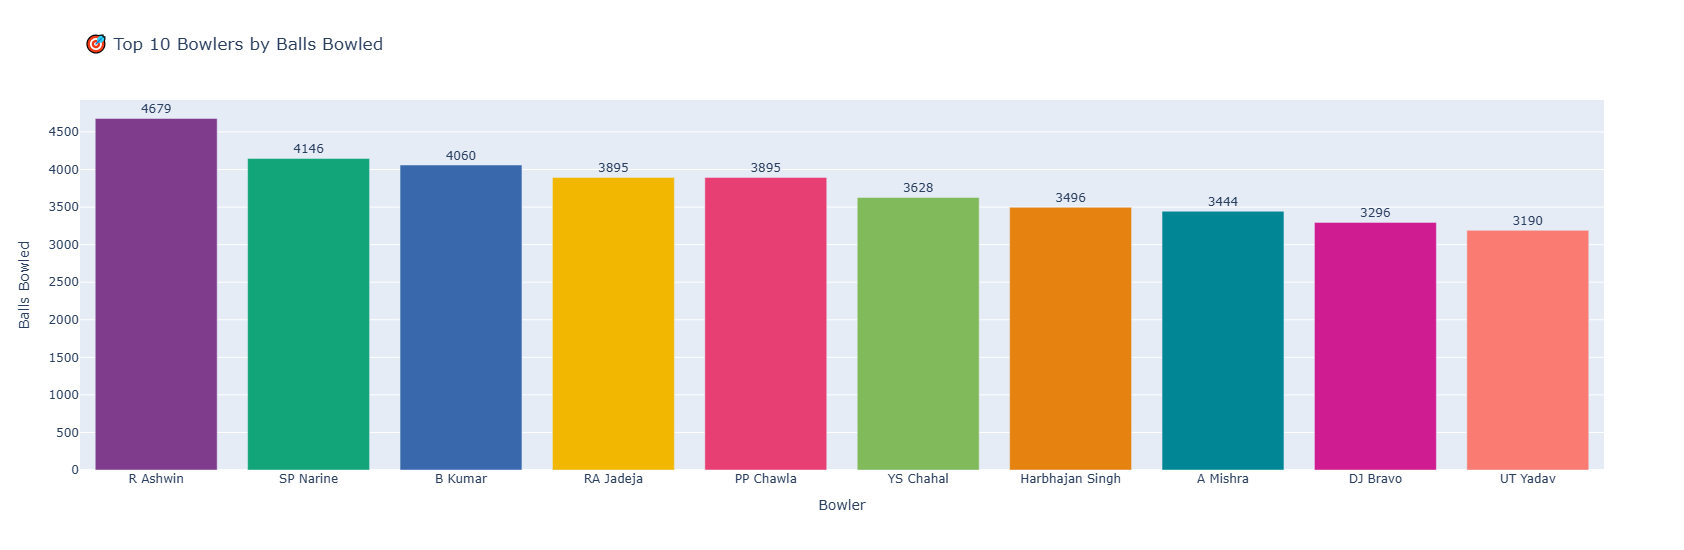

In [31]:
balls_faced = data['batter'].value_counts().reset_index()
balls_faced.columns = ['batter', 'balls_faced']

top_batters = balls_faced.head(10)

fig_bat = px.bar(
    top_batters,
    x='batter',
    y='balls_faced',
    title='🏏 Top 10 Batters by Balls Faced',
    text='balls_faced',
    color='batter',
    color_discrete_sequence=px.colors.qualitative.Vivid
)
fig_bat.update_traces(textposition='outside')
fig_bat.update_layout(
    xaxis_title='Batter',
    yaxis_title='Balls Faced',
    xaxis={'categoryorder': 'total descending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height=500,
    showlegend = False
)
fig_bat.show()

balls_bowled = data['bowler'].value_counts().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']

top_bowlers = balls_bowled.head(10)

fig_bowl = px.bar(
    top_bowlers,
    x='bowler',
    y='balls_bowled',
    title='🎯 Top 10 Bowlers by Balls Bowled',
    text='balls_bowled',
    color='bowler',
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig_bowl.update_traces(textposition='outside')
fig_bowl.update_layout(
    xaxis_title='Bowler',
    yaxis_title='Balls Bowled',
    xaxis={'categoryorder': 'total descending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height=550,
    showlegend = False
)
fig_bowl.show()

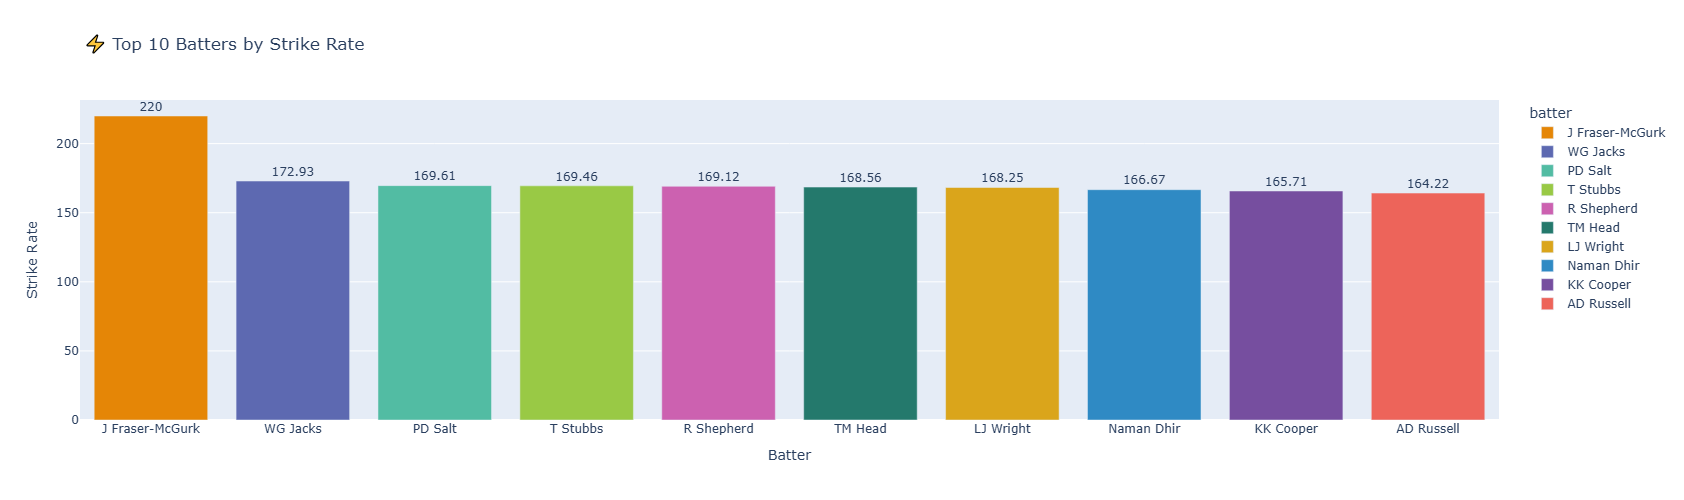

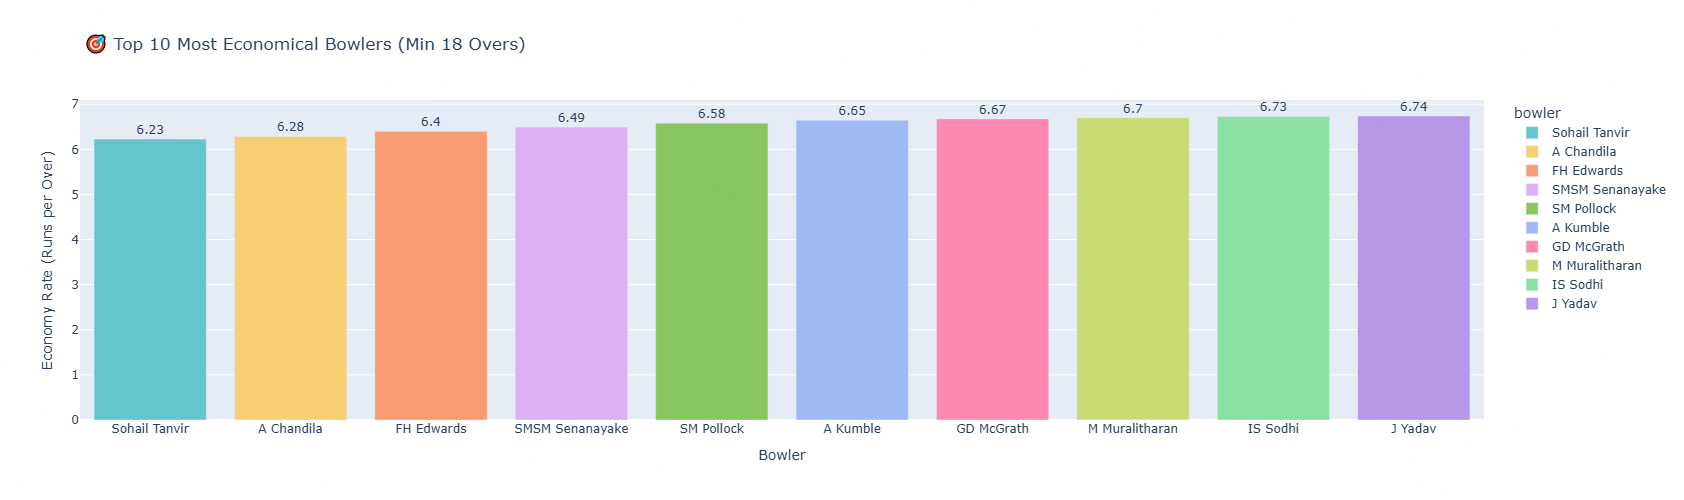

In [32]:
# ----------- Strike Rate Calculation --------
# Total runs scored by each batter
runs_by_batter = data.groupby('batter')['batsman_runs'].sum()

balls_faced = data['batter'].value_counts()

strike_rate_df = pd.DataFrame({
    'runs': runs_by_batter,
    'balls_faced': balls_faced
}).reset_index()

strike_rate_df['strike_rate'] = (strike_rate_df['runs'] / strike_rate_df['balls_faced']) * 100

top_sr = strike_rate_df[strike_rate_df['balls_faced'] >= 50].sort_values(by='strike_rate', ascending=False).head(10)

fig_sr = px.bar(
    top_sr,
    x='batter',
    y='strike_rate',
    title='⚡ Top 10 Batters by Strike Rate',
    text=top_sr['strike_rate'].round(2),
    color='batter',
    color_discrete_sequence=px.colors.qualitative.Vivid
)
fig_sr.update_traces(textposition='outside')
fig_sr.update_layout(
    xaxis_title='Batter',
    yaxis_title='Strike Rate',
    xaxis={'categoryorder': 'total descending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height=500
)
fig_sr.show()

# -------- Runs Given by Bowler per Over ----------

min_overs_bowled = 18  # Minimum 18 overs = 108 balls
min_balls_bowled = min_overs_bowled * 6

bowler_stats = data.groupby('bowler').agg(
    runs_conceded=('total_runs', 'sum'),
    balls_bowled=('bowler', 'count')  # Each row = one ball
).reset_index()

bowler_stats['overs_bowled'] = bowler_stats['balls_bowled'] / 6
bowler_stats['economy_rate'] = bowler_stats['runs_conceded'] / bowler_stats['overs_bowled']

bowler_stats_filtered = bowler_stats[bowler_stats['balls_bowled'] >= min_balls_bowled]

top_economical_bowlers = bowler_stats_filtered.sort_values(by='economy_rate', ascending=True).head(10)

## graph
fig = px.bar(
    top_economical_bowlers,
    x='bowler',
    y='economy_rate',
    title=f'🎯 Top 10 Most Economical Bowlers (Min {min_overs_bowled} Overs)',
    text=top_economical_bowlers['economy_rate'].round(2),
    color='bowler',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Bowler',
    yaxis_title='Economy Rate (Runs per Over)',
    xaxis={'categoryorder': 'total ascending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height=500
)

fig.show()

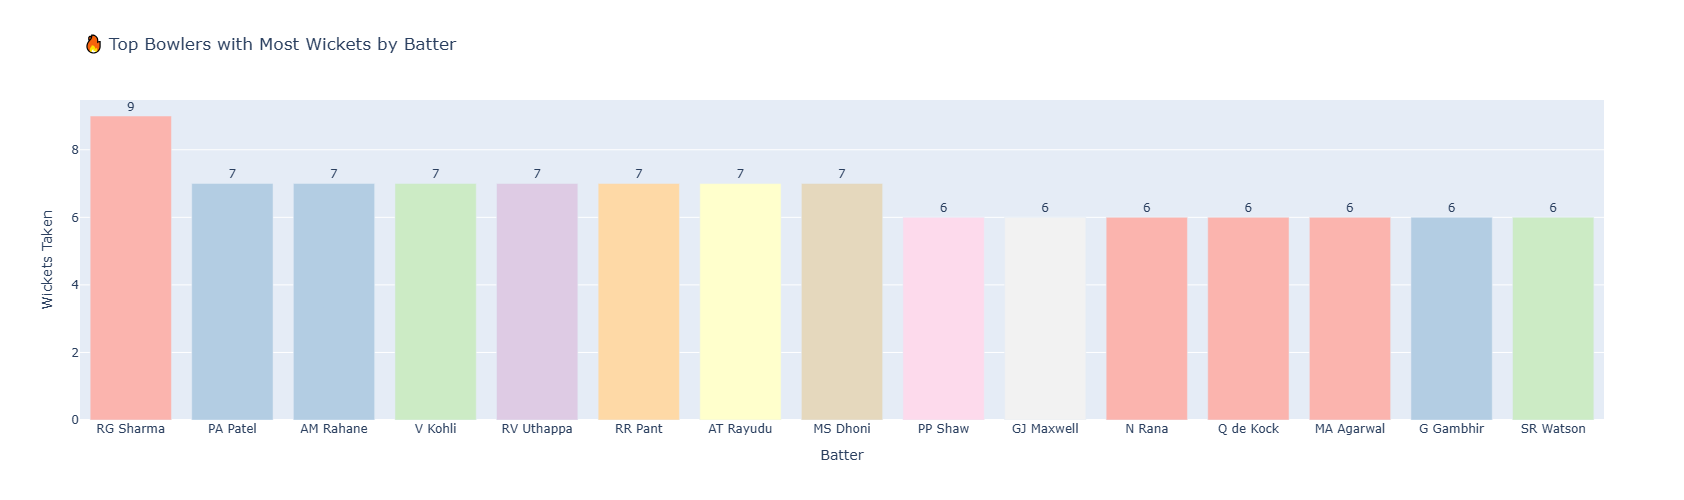

In [33]:
wickets_data = data[data['is_wicket'] == 1]  

wickets_by_bowler_batter = wickets_data.groupby(['batter', 'bowler']).size().reset_index(name='wicket_count')

top_bowler_per_batter = wickets_by_bowler_batter.loc[wickets_by_bowler_batter.groupby('batter')['wicket_count'].idxmax()]

top_bowler_per_batter_sorted = top_bowler_per_batter.sort_values(by='wicket_count', ascending=False)

top_10 = top_bowler_per_batter_sorted.head(15)

fig = px.bar(
    top_10,
    x='batter',
    y='wicket_count',
    color='bowler',
    title='🔥 Top Bowlers with Most Wickets by Batter',
    text='wicket_count',
    color_discrete_sequence=px.colors.qualitative.Pastel1
)
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Batter',
    yaxis_title='Wickets Taken',
    height=500,
    showlegend = False
)
fig.show()

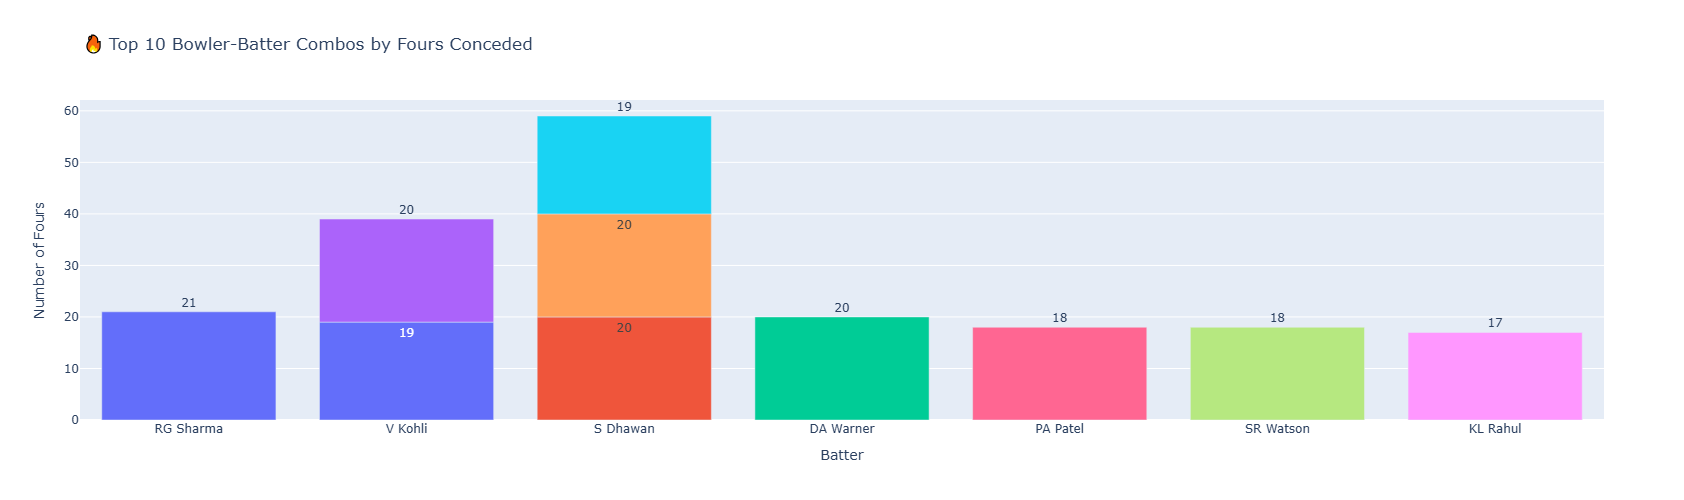

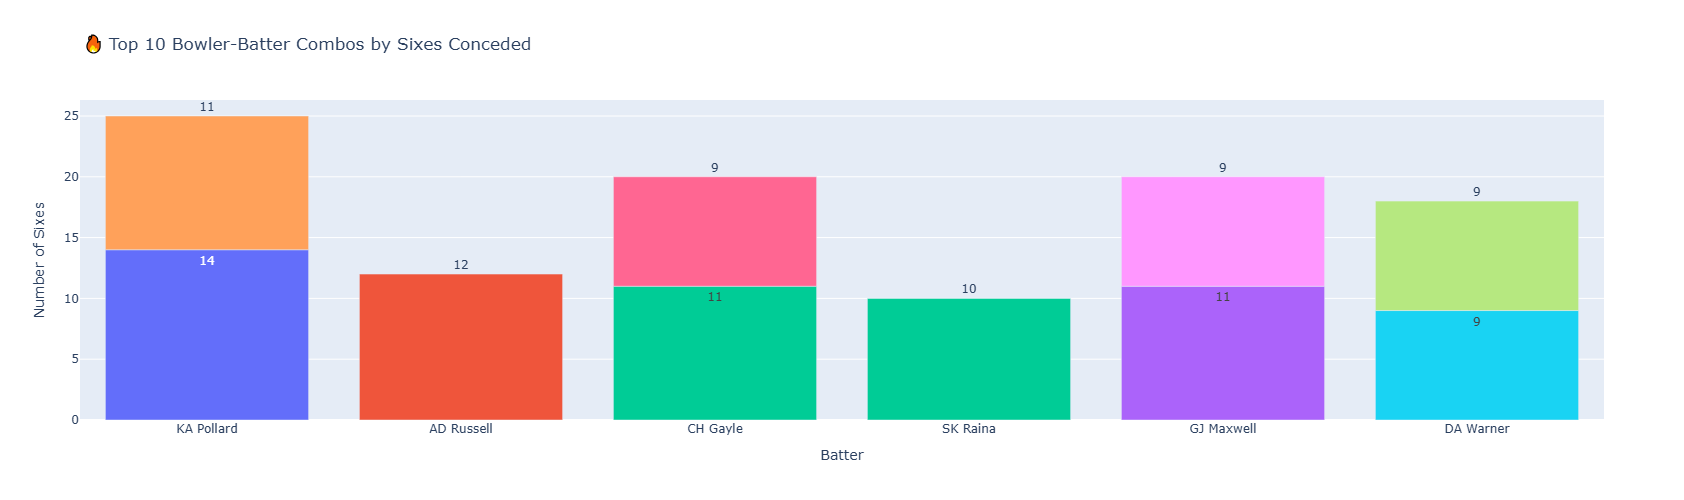

In [34]:
fours_data = data[data['batsman_runs'] == 4]
fours_count = fours_data.groupby(['batter', 'bowler']).size().reset_index(name='fours_count')
top_fours = fours_count.sort_values(by='fours_count', ascending=False).head(10)

fig_fours = px.bar(
    top_fours,
    x='batter',
    y='fours_count',
    color='bowler',
    title='🔥 Top 10 Bowler-Batter Combos by Fours Conceded',
    text='fours_count',
    # barmode='group'
)
fig_fours.update_traces(textposition='outside')
fig_fours.update_layout(
    xaxis_title='Batter',
    yaxis_title='Number of Fours',
    height=500,
    showlegend = False
)
fig_fours.show()

### sixes-------------

sixes_data = data[data['batsman_runs'] == 6]
sixes_count = sixes_data.groupby(['batter', 'bowler']).size().reset_index(name='sixes_count')
top_sixes = sixes_count.sort_values(by='sixes_count', ascending=False).head(10)

fig_sixes = px.bar(
    top_sixes,
    x='batter',
    y='sixes_count',
    color='bowler',
    title='🔥 Top 10 Bowler-Batter Combos by Sixes Conceded',
    text='sixes_count',
    # barmode='group'
)
fig_sixes.update_traces(textposition='outside')
fig_sixes.update_layout(
    xaxis_title='Batter',
    yaxis_title='Number of Sixes',
    height=500,
    showlegend = False
)

fig_sixes.show()


# Top Performing Franchise

In [35]:
team_runs = data.groupby('batting_team')['total_runs'].sum().reset_index(name='total_runs') ## here we pick batting tema or bowling team is does't matter so we can also select bowling team but the result is same.

team_matches = data.groupby('batting_team')['match_id'].nunique().reset_index(name='matches_played') ## count all the team

team_wickets = data[data['is_wicket'] == 1].groupby('batting_team')['is_wicket'].count().reset_index(name='wickets_lost')  ## for count avarage wicket per match 

team_balls = data.groupby('batting_team').size().reset_index(name='balls_faced')
team_balls['overs_faced'] = team_balls['balls_faced'] / 6

team_stats = team_runs.merge(team_matches, on='batting_team') \
                      .merge(team_wickets, on='batting_team') \
                      .merge(team_balls[['batting_team', 'overs_faced']], on='batting_team')

team_stats['run_rate'] = team_stats['total_runs'] / team_stats['overs_faced']
team_stats['wickets_per_match'] = team_stats['wickets_lost'] / team_stats['matches_played']

team_stats['score'] = (team_stats['run_rate'] * 2) - team_stats['wickets_per_match'] + team_stats['matches_played'] * 0.1

best_teams = team_stats.sort_values(by='score', ascending=False).reset_index(drop=True)


In [36]:
best_teams

,batting_team,total_runs,matches_played,wickets_lost,overs_faced,run_rate,wickets_per_match,score
0,Mumbai Indians,42176,261,1573,5239.500000,8.049623,6.026820,36.172426
1,Royal Challengers Bengaluru,40622,255,1483,5003.833333,8.118176,5.815686,35.920666
2,Kolkata Knight Riders,39331,251,1491,4919.000000,7.995731,5.940239,35.151223
3,Chennai Super Kings,38629,237,1245,4775.166667,8.089561,5.253165,34.625957
4,Rajasthan Royals,34747,220,1312,4373.666667,7.944593,5.963636,31.925549
5,Kings XI Punjab,30064,190,1158,3774.333333,7.965380,6.094737,28.836024
6,Sunrisers Hyderabad,29071,182,1058,3640.500000,7.985442,5.813187,28.357696
7,Delhi Daredevils,24296,161,952,3131.000000,7.759821,5.913043,25.706599
8,Delhi Capitals,14900,91,570,1824.333333,8.167367,6.263736,19.170998
9,Deccan Chargers,11463,75,484,1505.666667,7.613239,6.453333,16.273144


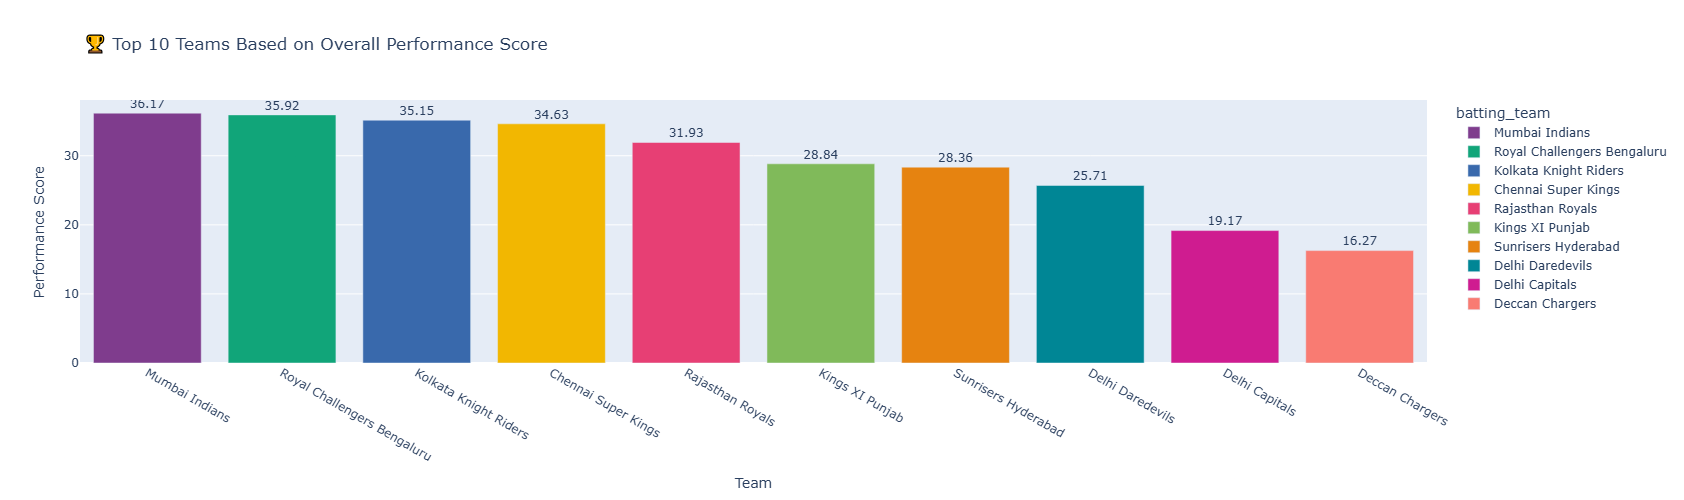

In [37]:
top_teams = best_teams.head(10)  ## top Teams

fig = px.bar(
    top_teams,
    x='batting_team',
    y='score',
    text=top_teams['score'].round(2),
    color='batting_team',
    color_discrete_sequence=px.colors.qualitative.Bold,
    title='🏆 Top 10 Teams Based on Overall Performance Score'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Performance Score',
    xaxis={'categoryorder': 'total descending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height=500,
)
fig.show()

In [38]:
# Base batter stats
batting_stats = data.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('batsman_runs', 'count'),
    sixes=('batsman_runs', lambda x: (x == 6).sum()),
    fours=('batsman_runs', lambda x: (x == 4).sum())
).reset_index()

dismissals = data[data['is_wicket'] == 1].groupby('batter').size().reset_index(name='dismissals')

# Merge dismissals
batting_stats = batting_stats.merge(dismissals, on='batter', how='left')
batting_stats['dismissals'] = batting_stats['dismissals'].fillna(0).astype(int)

# Calculate metrics
batting_stats['strike_rate'] = (batting_stats['total_runs'] / batting_stats['balls_faced']) * 100
batting_stats['boundary_rate'] = (batting_stats['sixes'] + batting_stats['fours']) / batting_stats['balls_faced']


batting_stats = batting_stats[batting_stats['balls_faced'] >= 250]  

# Custom score -  ## standardize score  all Metrices are in 00
batting_stats['score'] = (
    (batting_stats['total_runs'] * 0.1) +  # / 10
    (batting_stats['strike_rate'] ) +  
    (batting_stats['boundary_rate'] * 1000 ) +  ##  * 1000
    (batting_stats['balls_faced']* 0.1 ) + ## / 10
    (batting_stats['dismissals'] )  
)

best_batters = batting_stats.sort_values(by='score', ascending=False)


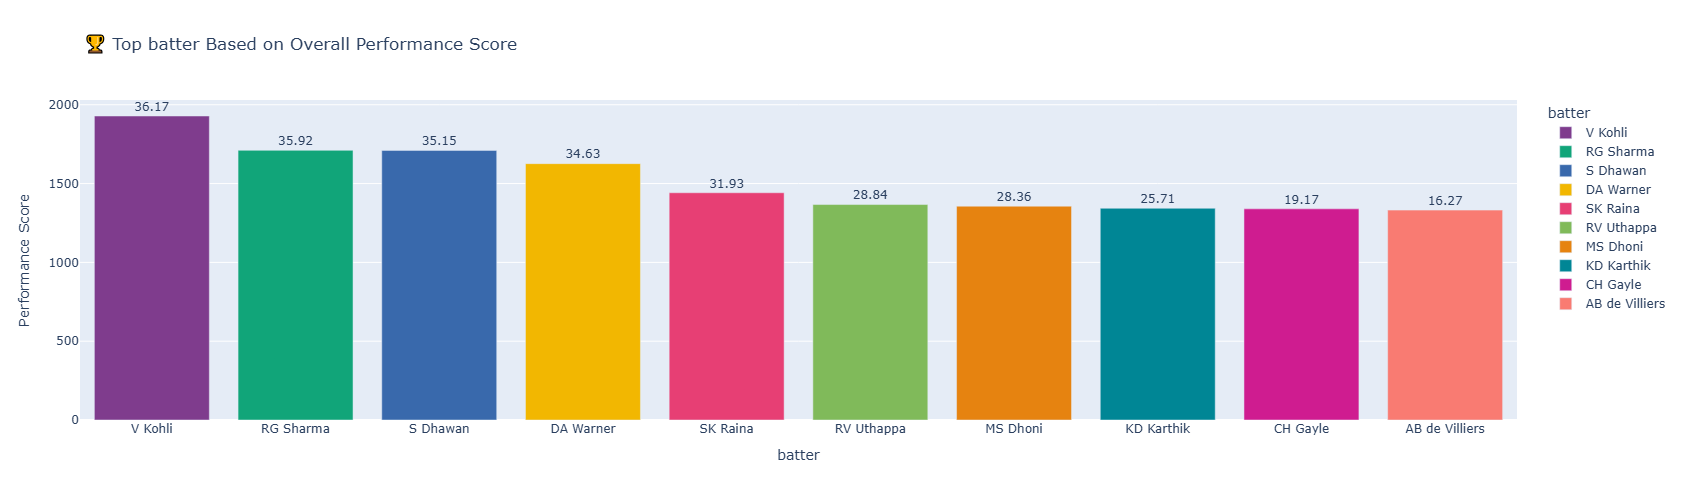

In [39]:
best = best_batters.head(10)
fig = px.bar(
    best,
    x='batter',
    y='score',
    text=top_teams['score'].round(2),
    color='batter',
    color_discrete_sequence=px.colors.qualitative.Bold,
    title='🏆 Top batter Based on Overall Performance Score'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='batter',
    yaxis_title='Performance Score',
    xaxis={'categoryorder': 'total descending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height=500,
)
fig.show()

top payer by six/four+runs+filding+strickrate+less wicket = score sort by score
best team by all over + lowest defend + highest run + no. of match playes + all out

In [40]:
from sklearn.preprocessing import MinMaxScaler


legal_deliveries = data[~data['extras_type'].isin(['wides', 'noballs'])]


valid_wickets = data[
    (data['is_wicket'] == 1) &
    (~data['dismissal_kind'].isin(['run out', 'retired hurt', 'obstructing the field']))
]

# Base stats per bowler
bowler_stats = data.groupby('bowler').agg(
    runs_conceded=('total_runs', 'sum'),
    extras_conceded=('extra_runs', 'sum')
).reset_index()

# Legal balls bowled
balls_bowled = legal_deliveries.groupby('bowler').size().reset_index(name='balls_bowled')
bowler_stats = bowler_stats.merge(balls_bowled, on='bowler', how='left')

#  Wickets taken
wickets = valid_wickets.groupby('bowler').size().reset_index(name='wickets')
bowler_stats = bowler_stats.merge(wickets, on='bowler', how='left')
bowler_stats['wickets'] = bowler_stats['wickets'].fillna(0).astype(int)


bowler_stats['overs_bowled'] = bowler_stats['balls_bowled'] / 6
bowler_stats['economy_rate'] = bowler_stats['runs_conceded'] / bowler_stats['overs_bowled']

#  Filter out  (minimum 3000 balls = 500 overs)
bowler_stats = bowler_stats[bowler_stats['balls_bowled'] >= 3000]

#  Normalize features for unbiased scoring
scaler = MinMaxScaler()
metrics = ['runs_conceded', 'extras_conceded', 'balls_bowled', 'wickets', 'economy_rate']
norm_values = scaler.fit_transform(bowler_stats[metrics])

# Add normalized columns
for i, col in enumerate(metrics):
    bowler_stats[f'norm_{col}'] = norm_values[:, i]

# Final unbiased scoree
bowler_stats['score'] = (
    (bowler_stats['norm_wickets'] * 0.35) +
    (bowler_stats['norm_balls_bowled'] * 0.15) -
    (bowler_stats['norm_runs_conceded'] * 0.20) -
    (bowler_stats['norm_extras_conceded'] * 0.15) -
    (bowler_stats['norm_economy_rate'] * 0.15)
)

top_bowlers = bowler_stats.sort_values(by='score', ascending=False)
top_bowlers[['bowler', 'wickets', 'economy_rate', 'runs_conceded', 'extras_conceded', 'balls_bowled', 'score']].head(10)


,bowler,wickets,economy_rate,runs_conceded,extras_conceded,balls_bowled,score
446,SP Narine,180,6.868905,4672,180,4081,0.192983
8,A Mishra,174,7.463067,4193,128,3371,0.147105
524,YS Chahal,205,7.976711,4681,203,3521,0.133306
348,PP Chawla,192,8.071169,5179,152,3850,0.082236
355,R Ashwin,180,7.208223,5435,257,4524,0.055246
193,JJ Bumrah,168,7.492683,3840,227,3075,0.054493
163,Harbhajan Singh,150,7.203162,4101,173,3416,0.046242
373,RA Jadeja,160,7.704884,4917,140,3829,0.015211
42,AR Patel,123,7.389372,3824,117,3105,-0.037305
71,B Kumar,181,7.750895,5051,307,3910,-0.039082


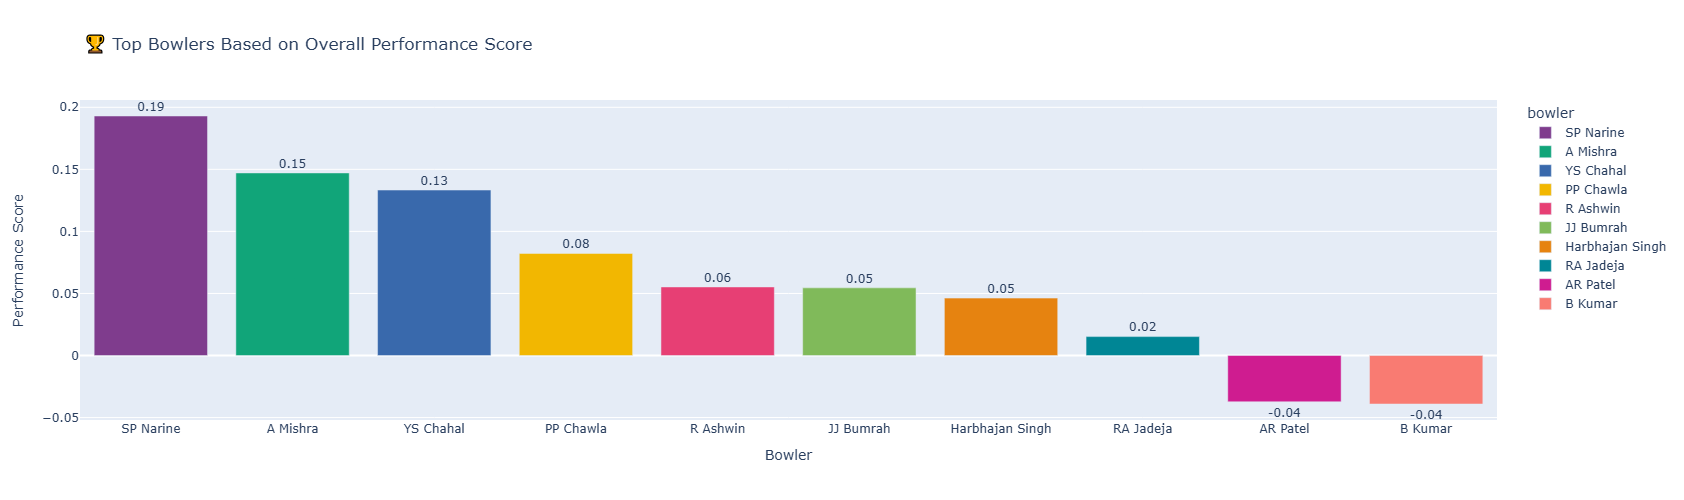

In [41]:
best = top_bowlers.head(10)

fig = px.bar(
    best,
    x='bowler',
    y='score',
    text=best['score'].round(2), 
    color='bowler',
    color_discrete_sequence=px.colors.qualitative.Bold,
    title='🏆 Top Bowlers Based on Overall Performance Score'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Bowler',
    yaxis_title='Performance Score',
    xaxis={'categoryorder': 'total descending'},
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height=500,
)

fig.show()

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">FINAL REPORT</div>


<h1 align="center" style="color:#ffa000; font-family:Georgia, serif;">
🏏 IPL Player & Team Performance Summary (Till 2022)
</h1>

---

### 🔝 Player Participation (Most Matches)

- 🥇 **Rohit Sharma** – 251 matches
- 🥈 **Virat Kohli** – 244 matches
- 🥇 **Ravindra Jadeja** – 211 matches (as a bowler)

---

### 💯 Batting Performance

- 🔥 **Most Runs in IPL History**:
  - 🥇 **Virat Kohli** – 8,014 runs
  - 🥈 **Shikhar Dhawan**
  - 🥉 **Rohit Sharma**

- 🧱 **Most Balls Faced**:
  - 🥇 **Virat Kohli** – 6,236 balls

- 💥 **Top Six Hitters**:
  - 🥇 **Chris Gayle**
  - 🥈 **Rohit Sharma**
  - 🥉 **Virat Kohli**
  - 🎯 Honorable Mentions: **AB de Villiers**, **MS Dhoni**, **David Warner**

- 🏏 **Top Four Hitters**:
  - 🥇 **Shikhar Dhawan**
  - 🥈 **Virat Kohli**
  - 🥉 **David Warner**

- 🏆 **Top Batting All-Rounders (Score based on runs, strike rate, wickets, boundary rate)**:
  - 🥇 **Virat Kohli**
  - 🥈 **Rohit Sharma**
  - 🥉 **Shikhar Dhawan**

---

### 🎯 Bowling Performance

- 🔝 **Most Wickets Taken**:
  - 🥇 **Yuzvendra Chahal** – 213 wickets
  - 🥈 **Dwayne Bravo** – 207 wickets

- 🏏 **Most Balls Bowled**:
  - 🥇 **Ravichandran Ashwin** – 4,679 balls

- 🔥 **Best Bowlers by Overall Economy & Impact Score** *(based on runs conceded, balls bowled, wickets)*:
  - 🥇 **Sunil Narine**
  - 🥈 **Amit Mishra**
  - 🥉 **Yuzvendra Chahal**

- ⚔️ **Most Wickets Against Key Batters**:
  - **Rohit Sharma** dismissed most by **Sunil Narine** – 9 times
  - **Virat Kohli** dismissed most by **Sandeep Sharma**

---

### 🧤 Wicketkeeping Records

- 🔝 **Most Dismissals by a Wicketkeeper**:
  - 🥇 **MS Dhoni**
  - 🥈 **Dinesh Karthik**, **Wriddhiman Saha**
  - 🎯 Other Top WKs: **Sanju Samson**, **Rishabh Pant**

---

### 🛡️ Fielding Performance

- 🥇 **AB de Villiers**
- 🥈 **Virat Kohli**
- 🥉 **Ravindra Jadeja**

(2008–2021 stats for fielding)

---

### ⚔️ Bowler vs Batter Matchups

- 🏏 **Rohit Sharma** hits most fours against:
  - **Umesh Yadav**

- 🏏 **Virat Kohli** hits most fours against:
  - **Umesh Yadav**, **Bhuvneshwar Kumar**

- 🏏 **Shikhar Dhawan** hits most fours against:
  - **Mohammed Shami**, **Dwayne Bravo**

---

### 🏆 Team Performance Rankings

- 🥇 **Mumbai Indians** – Best performing team overall
- 🥈 **Royal Challengers Bangalore**
- 🥉 **Kolkata Knight Riders**

---

> 📊 This report summarizes IPL performances up to the 2022 season using in-depth analytics, covering batting, bowling, wicketkeeping, fielding, and team contributions.
